#A closer look at EM

The main idea is: we express the log-likelihood of $(X,Y)$ as:

$\log [P((X,Y)|\Theta)]$,
and we want to find the $\Theta = (\mu, \Sigma)$ such that 

$\Theta = argmax (log (P(X, Y))$

If we have clusters, we change that to:

$(\Theta, \pi_j) = argmax [\sum_j (\pi_j * log (P((X, Y)|\Theta))]$

The $\pi_j$ is the probability of the point being in cluster $j$.   The right-hand side is the **expected value**.  Hence the EM method.



The original publication outlining the method is here:  http://www.isi.edu/natural-language/teaching/cs562/2009/readings/DLR77.pdf

A more intuitive explanation is here:  http://www.nature.com/nbt/journal/v26/n8/full/nbt1406.html

##Videos
A video of how GMM works is here:  https://www.youtube.com/watch?v=v-pq8VCQk4M  
A more explanatory video is here:  https://www.youtube.com/watch?v=EQx_BOk_SM0 - this approach, or variants of it, can be, and is being, used in, e.g., seasonality detection in time series data.

In the lecture, the $E-M$ method was covered very well; so we'll go straight into a practical example.  We will use the same $iris$ data set here.  As we know from the lecture, $GMM$ is the most common implementation of the $E-M$ method for clustering.

Please review the following material when you have time:  http://www.nehalemlabs.net/prototype/blog/2014/04/03/quick-introduction-to-gaussian-mixture-models-with-python/.  Details of sklearn implementation are here:  http://scikit-learn.org/stable/modules/mixture.html

In [5]:
%matplotlib inline

## Load libraries
import numpy as np
import scipy as sp
from sklearn.mixture import gmm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Load the data set. Clustering belongs to unsupervised learning; so we are not going to need the labels ($iris.target$ is irrelevant; working only with $iris.data$), and we are not breaking the data into training and test sets.

In [6]:
# Load the data, which is included in sklearn.
iris = load_iris()
print iris.feature_names
X, Names = iris.data, iris.feature_names
print X.shape

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)  #  To ensure repeatability of results
shuffle = np.random.permutation(np.arange(X.shape[0]))
X = X[shuffle]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)


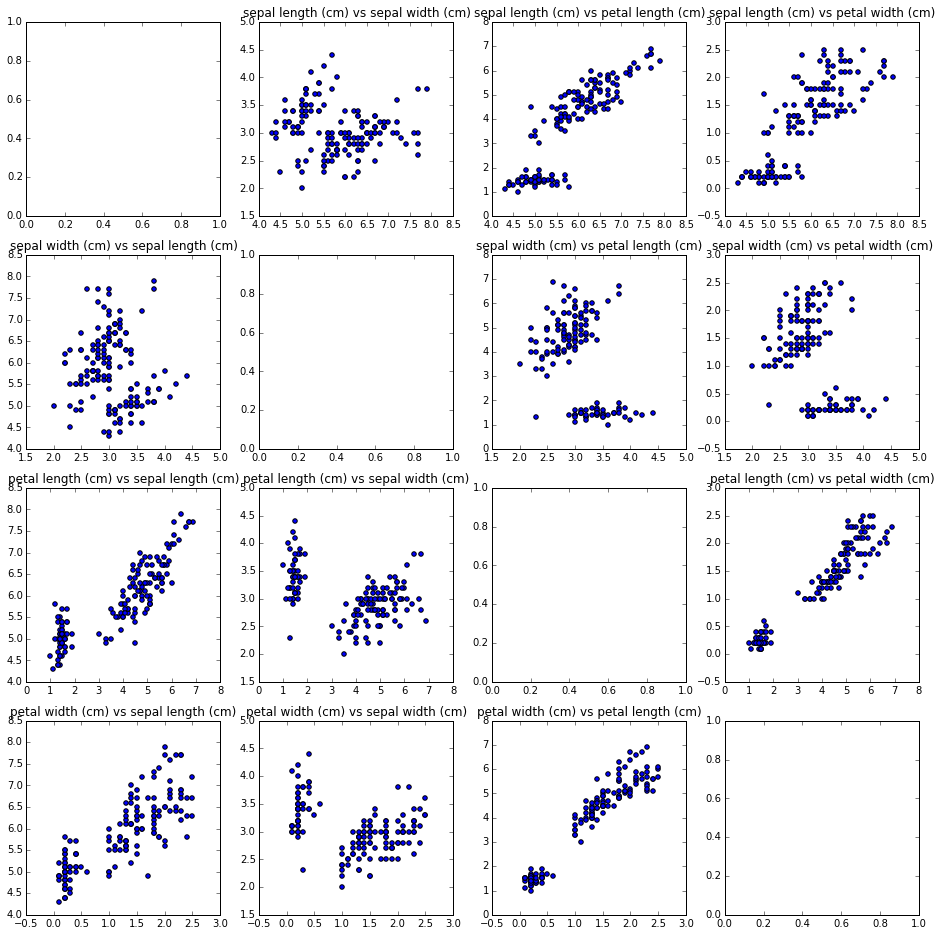

In [7]:
fig, axes = plt.subplots(nrows=X.shape[1], ncols=X.shape[1], sharex=False, sharey=False, figsize = (16, 16))


for f1 in np.arange (X.shape[1]):
    for f2 in np.arange (X.shape[1]):
       if not f1 == f2:
            ax = axes[f1, f2]
            ax.scatter (X[:,f1], X[:,f2])
            ax.set_title (Names[f1] + " vs " + Names[f2])
            
plt.show()

Now we'll select a pair of features (e.g., the same 0 and 1 as last week) and work with these two:

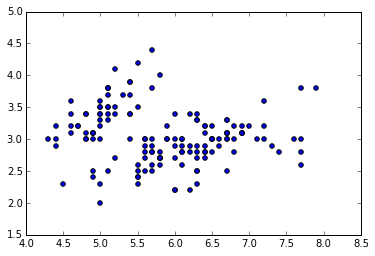

In [8]:
Xpair = X[:,(0,1)]

plt.scatter(Xpair[:, 0], Xpair[:, 1])
plt.show()

(2, 2)
[[ 5.22409639  3.1253012 ]
 [ 6.61044776  2.96567164]]


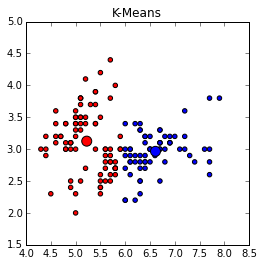

In [9]:
km = KMeans (n_clusters=2, init='k-means++')
clstrs = km.fit (Xpair)
print clstrs.cluster_centers_.shape
print clstrs.cluster_centers_
myColors = ('r', 'b', 'c', 'm', 'g')

myClCols = np.empty(Xpair.shape[0], 'string')
for ii in np.arange (0, len(clstrs.labels_)):
    color_index = clstrs.labels_[ii]
    myClCols[ii] = myColors[color_index]

plt.figure(figsize = (4, 4))
plt.scatter (Xpair[:,0], Xpair[:,1], c = myClCols)
plt.scatter (clstrs.cluster_centers_[:, 0], clstrs.cluster_centers_[:, 1], c = ('r', 'b'), s = 100)
plt.title("K-Means")

plt.show()

This was K-means clustering.  Now we are going to see how GMM works in this case: still 2 clusters for now.

[[ 5.0163022   3.44363196]
 [ 6.23728213  2.86840235]]
[1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0
 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0
 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1
 1 0]


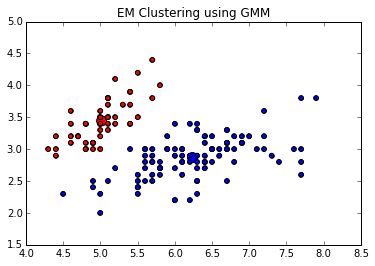

In [11]:
my_gmm = gmm.GMM(n_components=2, covariance_type="full")
my_gmm.fit(Xpair)
print my_gmm.means_
gmm_cls = my_gmm.predict(Xpair)
print gmm_cls

myColors = ('r', 'b', 'c', 'm', 'g', 'p')
myClCols = np.empty(Xpair.shape[0], 'string')
for ii in np.arange (0, len(clstrs.labels_)):
    color_index = gmm_cls[ii]
    myClCols[ii] = myColors[color_index]
    
plt.scatter (Xpair[:, 0], Xpair[:, 1], c = 'k')
plt.scatter (my_gmm.means_[:, 0], my_gmm.means_[:, 1], c = ('r', 'b'), s = 100)
plt.scatter (Xpair[:, 0], Xpair[:, 1], c = myClCols)
plt.title ("EM Clustering using GMM")

plt.show()

The GMM object has BIC and AIC calculations implemented for the EM procedure.

In [57]:
print "BIC = %.3f; AIC = %.3f" %(my_gmm.bic(Xpair), my_gmm.aic(Xpair))

BIC = 507.179; AIC = 474.062


N = 1; BIC = 565.314; AIC = 550.261
N = 2; BIC = 507.179; AIC = 474.062
N = 3; BIC = 529.940; AIC = 478.759
N = 4; BIC = 539.385; AIC = 470.141
N = 5; BIC = 561.736; AIC = 474.428
N = 6; BIC = 585.223; AIC = 479.851
N = 7; BIC = 601.292; AIC = 477.856
N = 8; BIC = 621.667; AIC = 480.168
N = 9; BIC = 647.157; AIC = 487.593
9
BIC is lowest at 507.179 (n_components = 2)
AIC is lowest at 470.141 (n_components = 4)
2 [1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0
 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0
 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1
 1 0]
4 [1 2 0 3 0 3 0 3 1 1 2 3 1 1 1 0 1 1 0 0 1 2 0 0 1 0 0 1 1 0 1 2 0 1 1 1 0
 1 2 1 3 0 3 0 0 1 1 1 2 2 1 3 3 1 2 1 1 2 3 1 3 0 1 1 2 1 1 1 0 0 2 2 0 0
 3 0 2 1 0 2 1 2 0 3 3 1 1 0 0 3 1 1 3 0 1 3 0 0 3 0 0 0 1 3 3 0 0 0 1 1 0
 0 1 0 3 1 1 3 0 1 0 3 0 0 3 0 3 1 1 1 3 1 2 1 0 1 

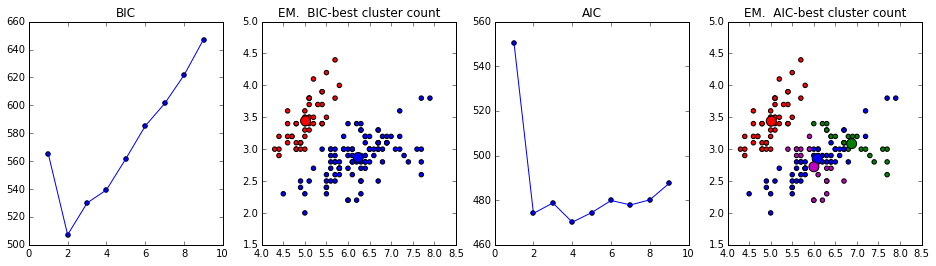

In [13]:
BICs = np.zeros(9)
AICs = np.zeros(9)
my_gmms = []

NN = np.arange (1, 10)
for nn in NN:
    my_gmm = gmm.GMM(n_components=nn, covariance_type="full")
    my_gmm.fit(Xpair)
    myBIC = my_gmm.bic (Xpair)
    myAIC = my_gmm.aic (Xpair)
    print "N = %d; BIC = %.3f; AIC = %.3f" %(nn, myBIC, myAIC)
    BICs[nn-1] = myBIC
    AICs[nn-1] = myAIC
    my_gmms.append (my_gmm)

print len(my_gmms)   

##  Now let's get the n_components that minimizes the BIC:
minBICindx = int (np.where(BICs == np.min(BICs))[0])
minAICindx = int (np.where(AICs == np.min(AICs))[0])

print "BIC is lowest at %.3f (n_components = %d)" %(BICs[minBICindx], NN[minBICindx])
print "AIC is lowest at %.3f (n_components = %d)" %(AICs[minAICindx], NN[minAICindx])
    
##  A picture is worth a thousand words
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))

##  Show the plot of BIC vs. number of clusters 
ax = axes[0]    
ax.scatter (NN, BICs)
ax.plot (NN, BICs)
ax.set_title ("BIC")

##  Show the clusters with counts optimized by BIC
ax = axes[1]

best_NN_bic = int(NN[minBICindx])
my_gmm_bic = my_gmms[minBICindx]
bic_gmm_cl = my_gmm_bic.predict(Xpair)
print best_NN_bic, bic_gmm_cl

myColors = ('r', 'b', 'm', 'g', 'c', 'o', 'p')
myClCols = np.empty(Xpair.shape[0], 'string')
for ii in np.arange (0, len(bic_gmm_cl)):
    color_index = bic_gmm_cl[ii]
    myClCols[ii] = myColors[color_index]

ax.scatter (Xpair[:, 0], Xpair[:, 1], c= myClCols)
ax.scatter (my_gmm_bic.means_[:,0], my_gmm_bic.means_[:,1], s = 100, c = myColors[:best_NN_bic])
ax.set_title ("EM.  BIC-best cluster count")

##  Show the plot of AIC vs. number of clusters 
ax = axes[2]    
ax.scatter (NN, AICs)
ax.plot (NN, AICs)
ax.set_title ("AIC")

##  Show the clusters with counts optimized by AIC
ax = axes[3]
best_NN_aic = int(NN[minAICindx])
my_gmm_aic = my_gmms[minAICindx]
aic_gmm_cl = my_gmm_aic.predict(Xpair)
print best_NN_aic, aic_gmm_cl
myClCols = np.empty(Xpair.shape[0], 'string')
for ii in np.arange (0, len(aic_gmm_cl)):
    color_index = aic_gmm_cl[ii]
    myClCols[ii] = myColors[color_index]


ax.scatter (Xpair[:,0], Xpair[:,1], c= myClCols)
ax.scatter (my_gmm_aic.means_[:,0], my_gmm_aic.means_[:,1], s = 100, c = myColors[:best_NN_aic])
ax.set_title ("EM.  AIC-best cluster count")


plt.show()


#Conclusions

We have demonstrated what EM clustering using the GMM algorithm does and how to use it in python.  We also reiterated the importance of $BIC$.  We also demonstrated why $AIC$ is not such a good idea.